### Produce figures for data application results (filter 1%)

In [16]:
library(ggplot2)
library(gridExtra)
library(ggpubr)

#### load results

In [18]:
bmi_gut = read.csv('../data_application/BMI/filter_onepercent/table_bmi_gut.txt', sep='\t')
soil_park = read.csv('../data_application/centralPark/filter_onepercent/table_soil_park.txt', sep='\t')
soil_88 = read.csv('../data_application/88soils/filter_onepercent/table_soil_88.txt', sep='\t')
oral_age = read.csv('../data_application/oral/filter_onepercent/table_oral_age.txt', sep='\t')
skin_age = read.csv('../data_application/skin/filter_onepercent/table_skin_age.txt', sep='\t')

#### summarize results into table

In [42]:
table = rbind(bmi_gut, soil_park, soil_88, oral_age, skin_age)
dim(table)

[1] 20  4

In [43]:
head(table)

dataset,method,mse,stability
bmi_gut,lasso,24.07,0.14
bmi_gut,elent,25.33,0.23
bmi_gut,rf,4.99,0.02
bmi_gut,compLasso,21.59,0.22
soil_park,lasso,0.15,0.23
soil_park,elent,0.12,0.27


In [45]:
summary(table)

      dataset        method       mse            stability    
 bmi_gut  :4   compLasso:5   Min.   : 0.0500   Min.   :0.020  
 soil_park:4   elent    :5   1st Qu.: 0.2525   1st Qu.:0.170  
 soil_88  :4   lasso    :5   Median :12.9250   Median :0.230  
 oral_age :4   rf       :5   Mean   :26.8095   Mean   :0.248  
 skin_age :4                 3rd Qu.:43.7300   3rd Qu.:0.315  
                             Max.   :98.2900   Max.   :0.490  

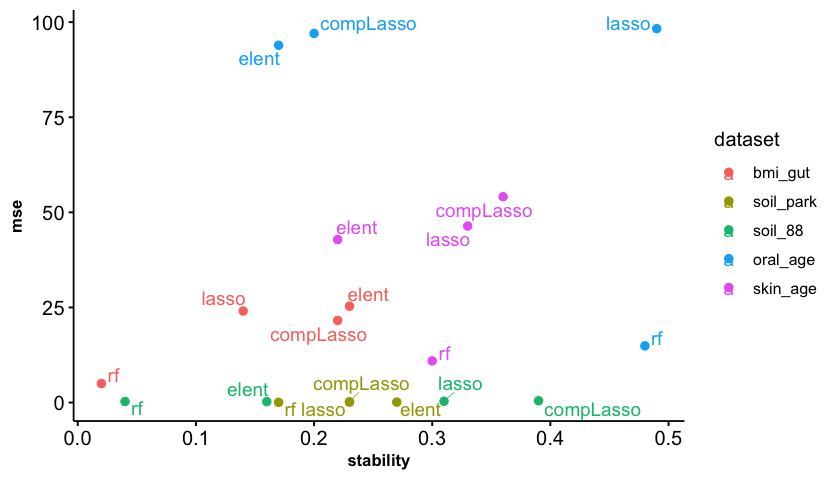

In [47]:
options(repr.plot.width=7, repr.plot.height=4)

ggscatter(table, x = "stability", y = "mse",
   color = "dataset", 
   label = "method", repel = TRUE) +
     theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              legend.position='right',
              panel.background = element_blank(), axis.line = element_line(colour = "black")) 

In [ ]:
# oral_age (blue): rf best (low MSE, relatively high stab -- very close to highest lasso)
# skin_age (pink): compLasso if stab; rf if MSE
# bmi_gut (orange): rf (low mse yet super low stability); compLasso (lower stability than elnet but lower mse)
# soil_park (greenish orange): lasso/compLasso
# soil_88 (green): compLasso 

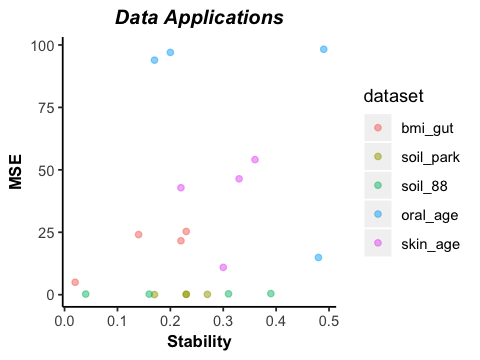

In [38]:
options(repr.plot.width=4, repr.plot.height=3)

ggplot(table, aes(x=stability, y=mse, color=dataset)) + geom_point(alpha = 0.5) + 
         labs(title='Data Applications', x='Stability', y='MSE') +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              legend.position='right',
              panel.background = element_blank(), axis.line = element_line(colour = "black")) 

# no clear association between mse and stability
# exists high mse high stab or low mse high stab
# issue with mse: range differs by dataset (re-scale to [0, 1]?)

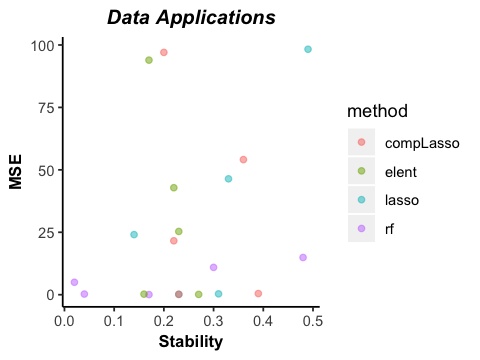

In [32]:
options(repr.plot.width=4, repr.plot.height=3)

ggplot(table, aes(x=stability, y=mse, color=method)) + geom_point(alpha = 0.5) + 
         labs(title='Data Applications', x='Stability', y='MSE') +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              legend.position='right',
              panel.background = element_blank(), axis.line = element_line(colour = "black")) 